In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time
import matplotlib.patches as mpatches

In [9]:
data = pd.read_csv('data.tsv', sep='\t', index_col=False)
data_fiat = pd.read_csv('fiat_pp.tsv', sep='\t', index_col=False)
fiat = data_fiat
fiat["Desc"] = 'Fiat'
bmw = data
bmw["Desc"] = "Bmw"
bmw = bmw.drop(bmw.columns[[0]], axis=1)
fiat = fiat.drop(fiat.columns[[0]], axis=1)
auta = pd.concat([fiat, bmw], ignore_index=True)

In [10]:
n_neighbors = [2,3,4,5,6,7,8,9,10,20,30]


df = auta.loc[(auta['Rok'] < 2018) & (auta['Rok'] > 2000)]
y = np.array([1 if elem == 'Fiat' else 0 for elem in df['Desc']])
X1 = [float(elem) + random.uniform(0.0, 0.9) for elem in df['Rok']]

X2 = df['Cena']
X3 = df["Przebieg"]
X = np.array([[elem1, elem2, elem3] for elem1, elem2, elem3 in zip(X1,X2,X3)])
red = y == 0
green = y == 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


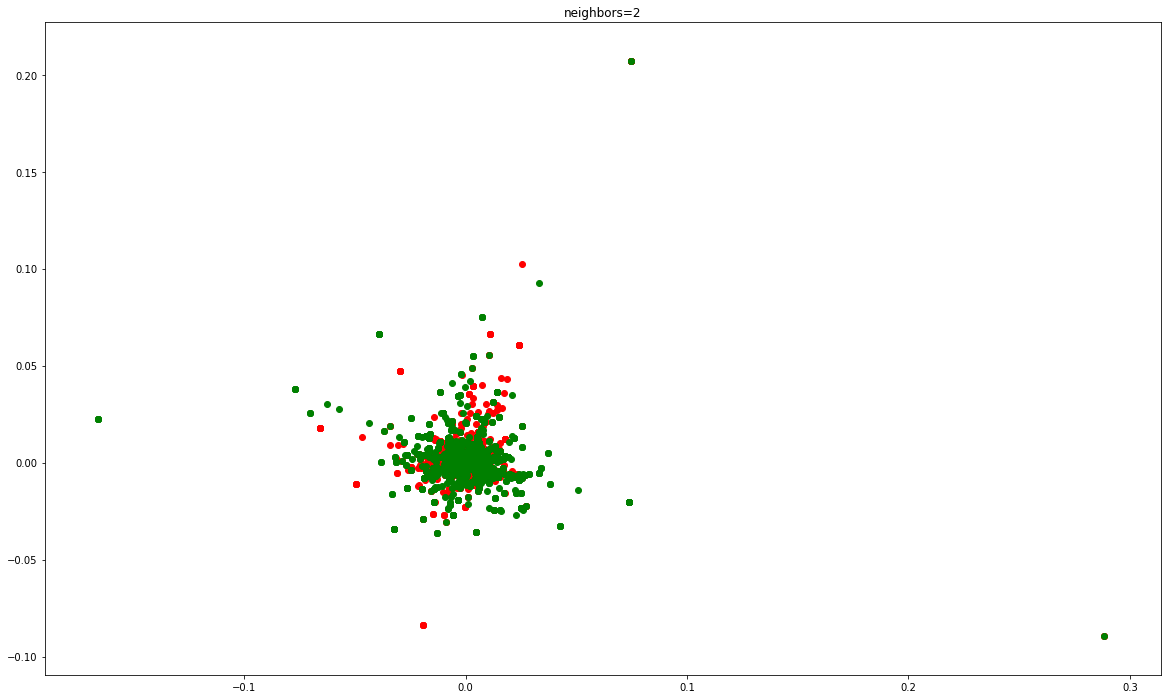

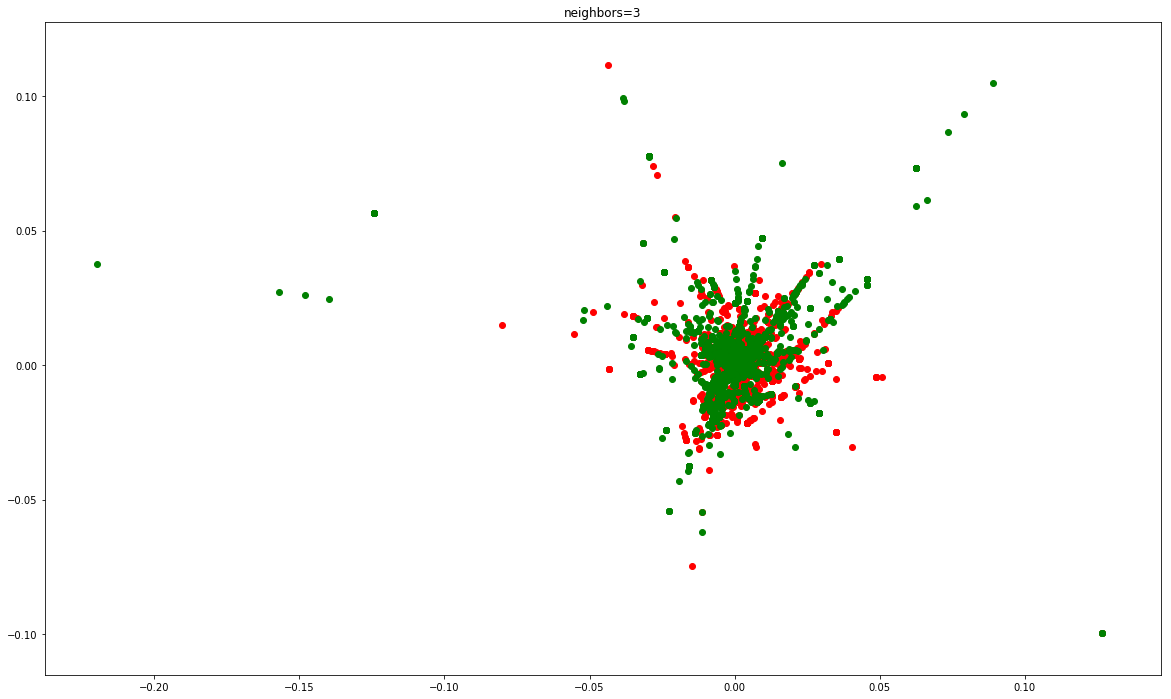

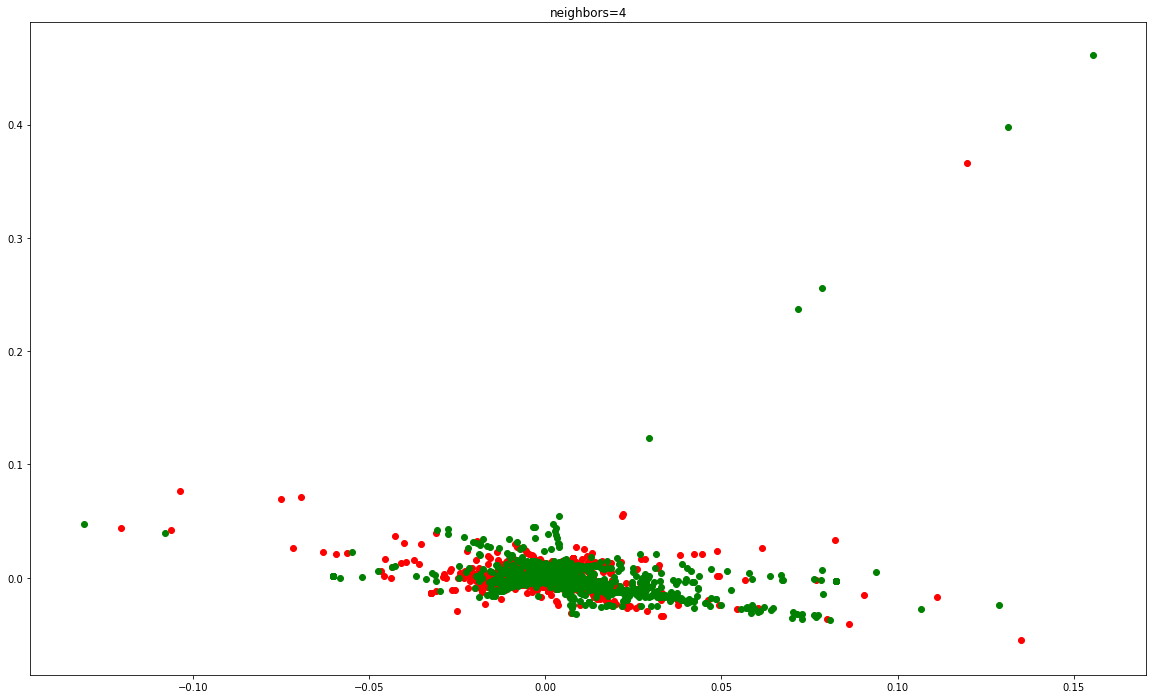

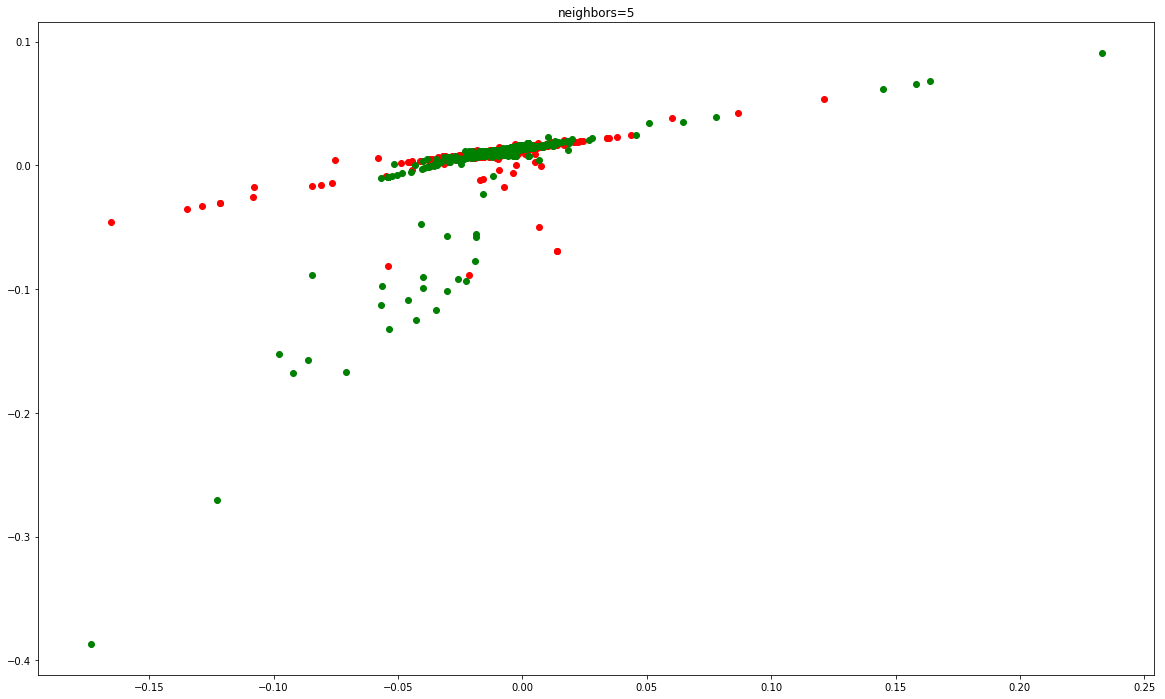

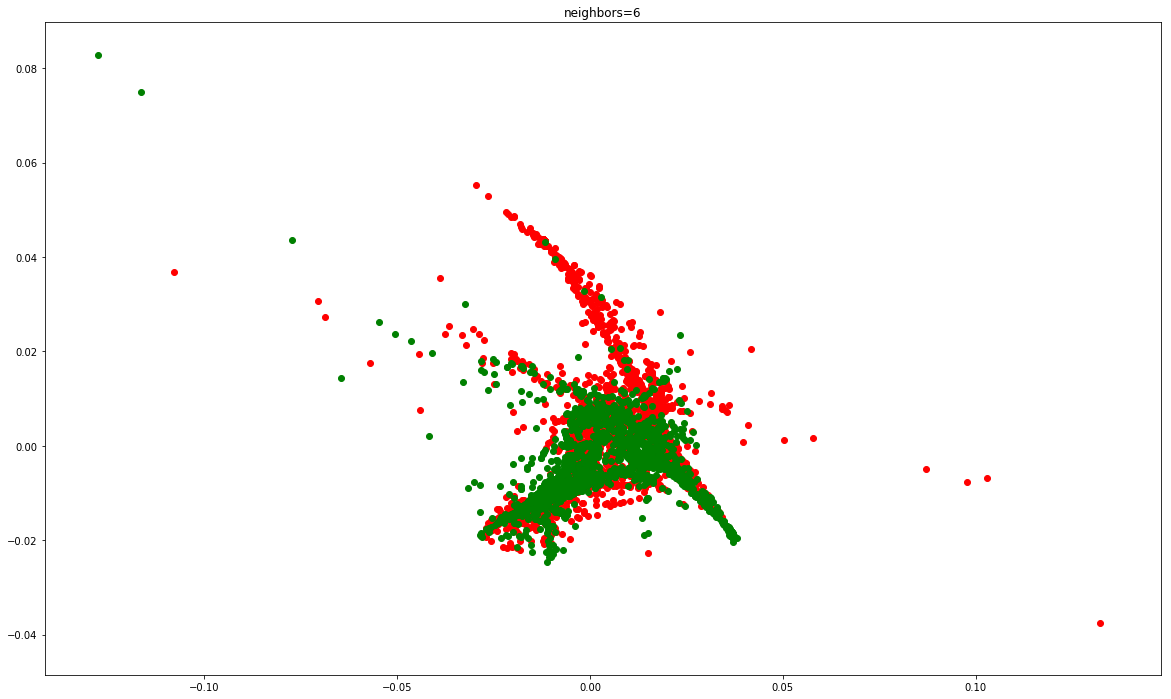

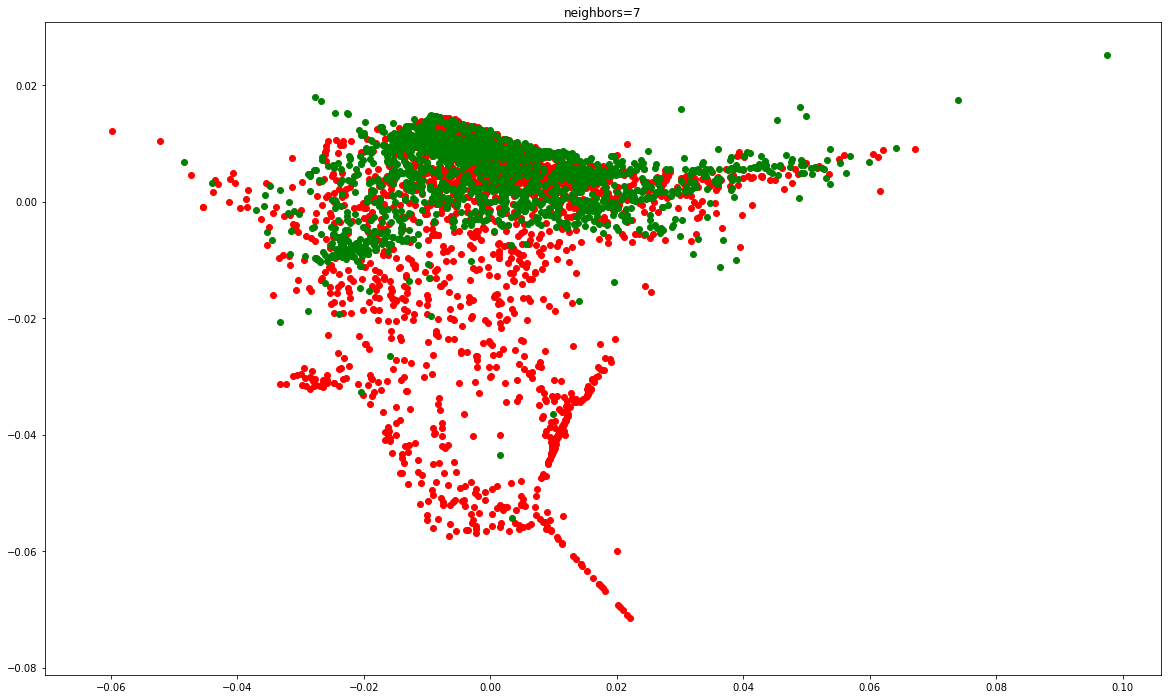

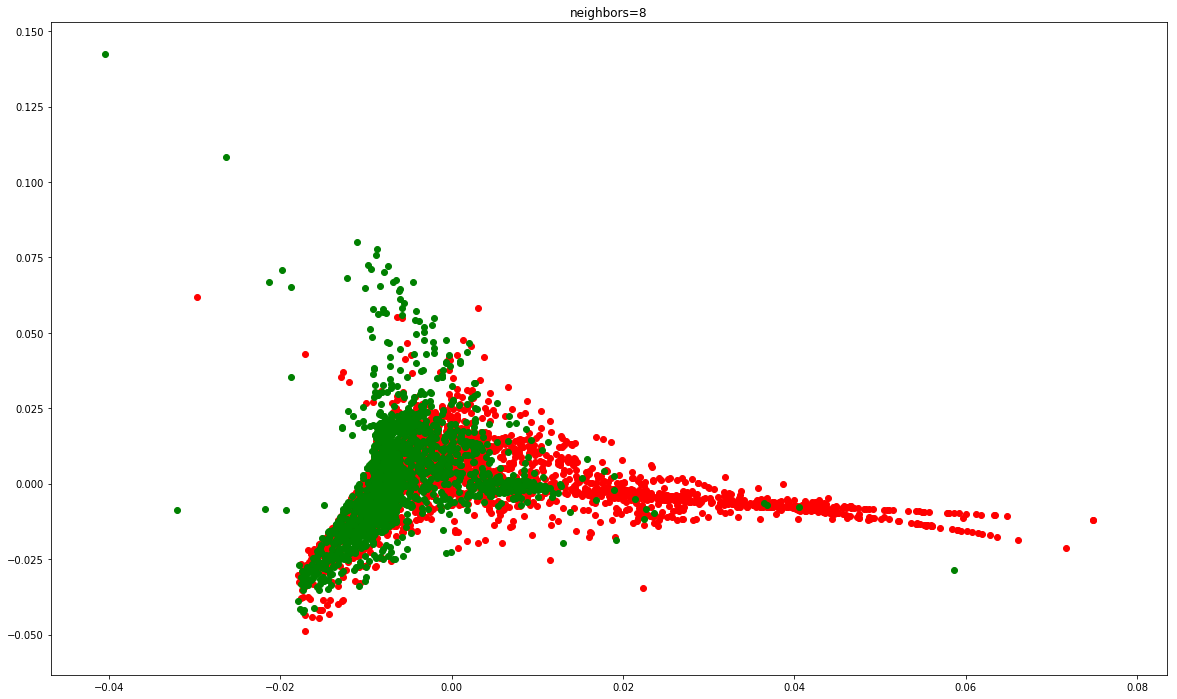

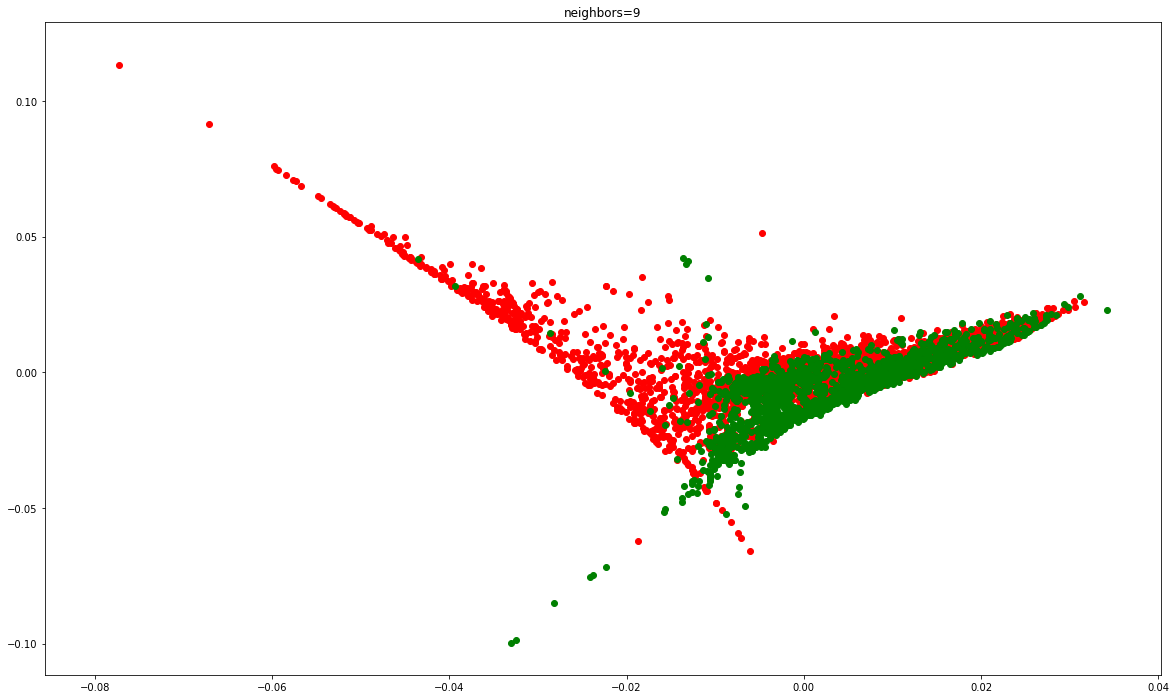

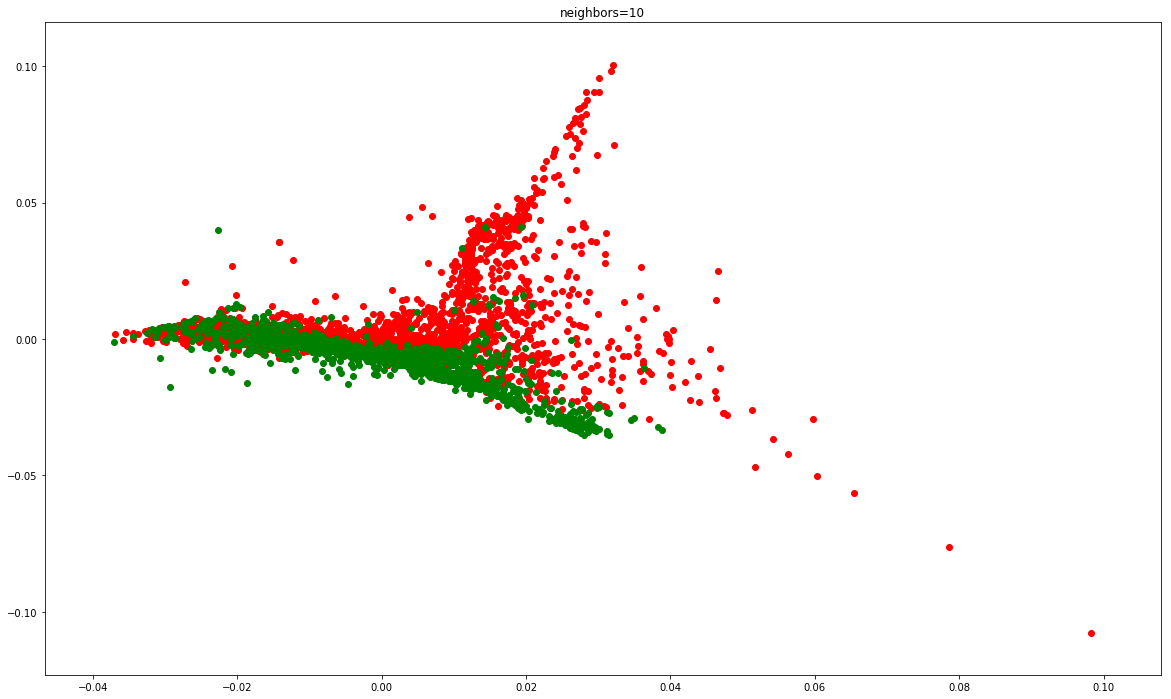

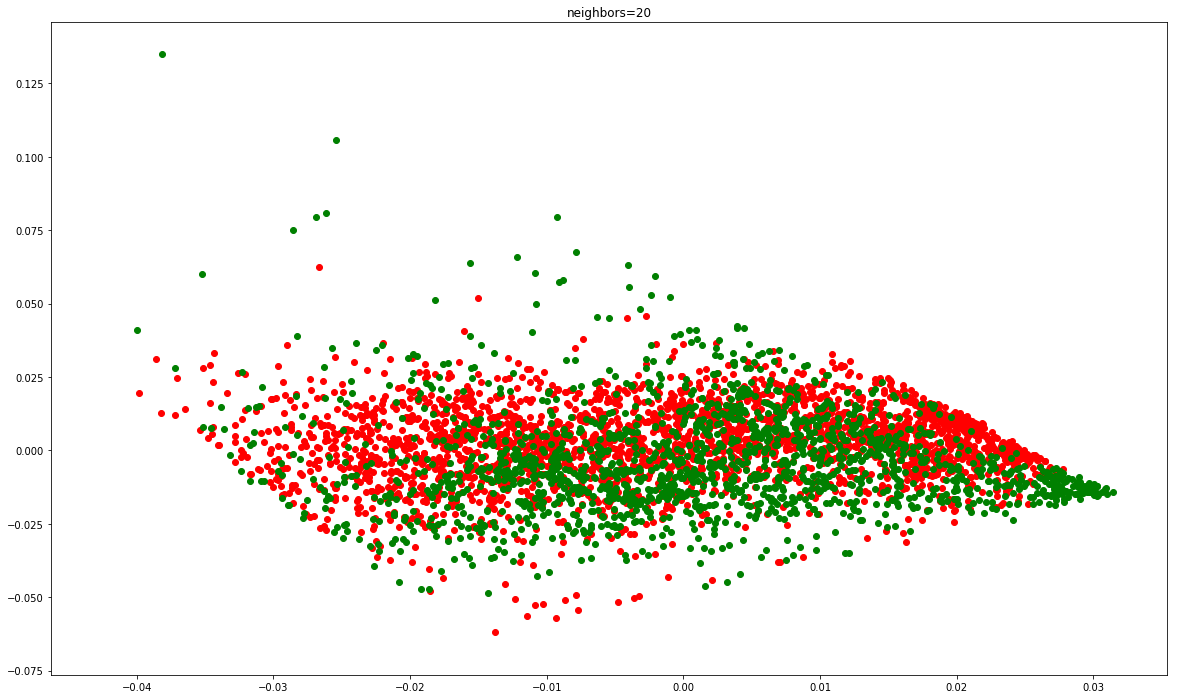

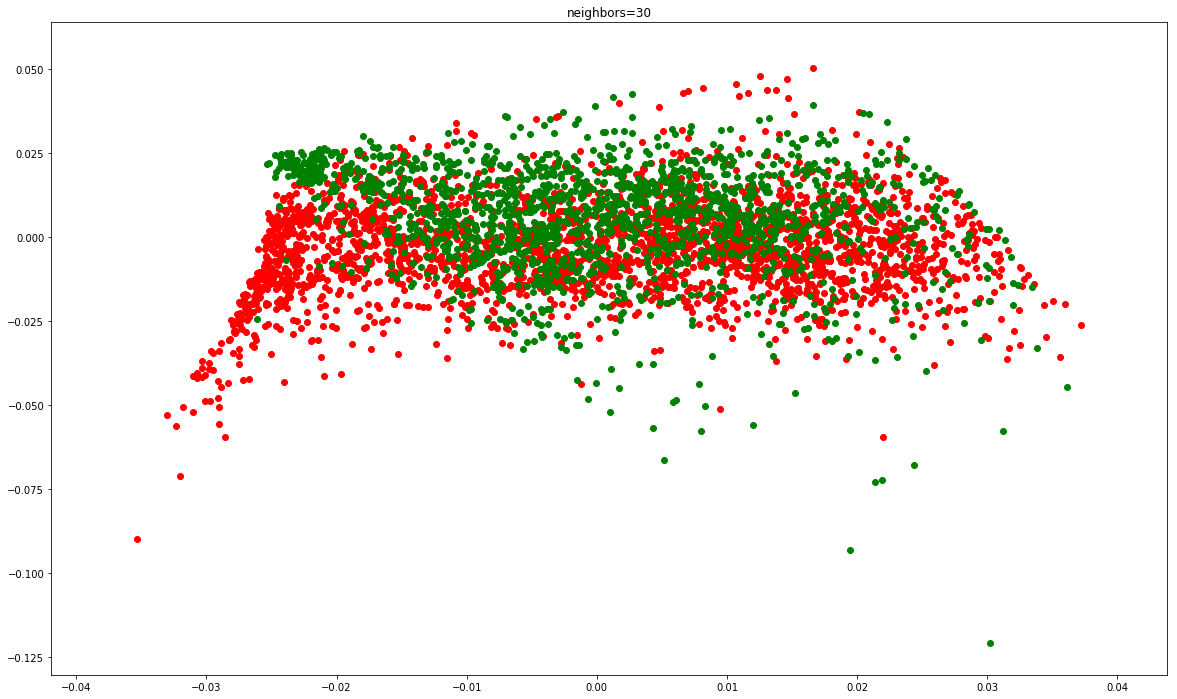

In [13]:

for n in n_neighbors:  
    fig = plt.figure(figsize=(20,12))
    tsne = manifold.LocallyLinearEmbedding(n_neighbors=n, n_jobs=-1, eigen_solver='dense')
    Y = tsne.fit_transform(X_scaled)
    plt.title("neighbors=%d" % n)
    plt.scatter(Y[red, 0], Y[red, 1], c="r")
    plt.scatter(Y[green, 0], Y[green, 1], c="g")
    fig.savefig("LLE_neighbors"+str(n)+".png")
        